# `spaxelsleuth` examples
---
In this notebook, you will learn how to use `spaxelsleuth` to 
1. create a `pandas` DataFrame containing spaxel-by-spaxel information for all SAMI galaxies;
2. use the included plotting tools to analyse the SAMI data set as a whole;
3. create plots that you can use to analyse specific galaxies. 

## Create the DataFrames
---
### Creating the "metadata" DataFrame
After you have installed `spaxelsleuth` and have downloaded the necessary files from [DataCentral](http://datacentral.org.au) (see the README), the first step is to create the "metadata" DataFrame containing basic information about each SAMI galaxy, such as redshifts, morphologies, and stellar masses.

In [ ]:
from spaxelsleuth.loaddata.sami import make_sami_metadata_df
make_sami_metadata_df()

In [1]:
import pandas as pd
df_metadata = pd.read_hdf("/priv/meggs3/u5708159/SAMI/sami_dr3/sami_dr3_metadata.hd5")

In [2]:
df_metadata.loc[100162]

a_g                           0.096
bad_class                         0
catid                        100162
dec_ifu                    0.934893
dec_obj                    0.934893
ellip                        0.4972
fillflag                        NaN
g_i                            0.59
is_mem                          NaN
m_r                          -18.67
mstar                          9.15
mu_1re                        20.84
mu_2re                        22.75
mu_within_1re                 20.24
pa                            47.02
r_auto                       16.692
r_e                            2.75
r_on_rtwo                       NaN
r_petro                      16.666
ra_ifu                      185.793
ra_obj                      185.793
surv_sami                         8
v_on_sigma                      NaN
z_spec                      0.02577
z_tonry                     0.02701
Morphology (numeric)              3
Morphology              Late spiral
Good?                       

### Creating the SAMI DataFrame
The next step is to create the DataFrame containing all measured quantities, such as emission line fluxes, stellar and gas kinematics, and extinction, for each individual spaxel in every SAMI galaxy. Each time this is run, it saves one copy of the DataFrame where the extinction correction has been applied, and one without. The resulting DataFrames are saved to file and can be accessed using `load_sami_df()`.

The input arguments are as follows:
* `ncomponents` determines which data set the function is run on. 
    * `ncomponents = "recom"` will use the data products produced using the multi-component Gaussian emission line fits, in which the `LZCOMP` neutral network was used to determine the optimal number of components in each spaxel.
    * `ncomponents = "1"` will use the data products produced using the single-component Gaussian emission line fits.
* `bin_type` refers to the spatial binning scheme used.
    * `bin_type = "default"` will use the data products produced using the unbinned data. 
    * `bin_type = "adaptive"` will use the data products produced using the Voronoi-binned data. 
    * `bin_type = "sectors"` will use the data products produced using the sector-binned data. 
* `eline_SNR_min` gives the minimum S/N for which a fitted emission line component will be accepted. All quantities associated with emission line components that fall below this S/N threshold (e.g. kinematics, fluxes, etc.) will be set to `np.nan`.

Note that running `make_sami_df()` for all ~3,000 SAMI galaxies takes some time - for a quick demo, set `DEBUG` here to `True`; this will create the DataFrame for a subset of 10 galaxies and is much quicker.

In [4]:
DEBUG = False

In [ ]:
from spaxelsleuth.loaddata.sami import make_sami_df

In [10]:
make_sami_df(ncomponents="recom", bin_type="default", eline_SNR_min=5, debug=DEBUG)

In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: saving to files sami_default_recom-comp_extcorr_minSNR=5_DEBUG.hd5...
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Beginning pool...


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for sl

In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 760733 (1)
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 619553 (4)
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 491956 (3)
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 513001 (6)
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 387080 (0)
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 417678 (7)
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 177326 (2)
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Finished processing 573736 (8)
In sami.make_df_sami() [

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A futu

In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2Ha_PP04 log(O/H) + 12  in 756/7484 (10.10%) of rows


  2%|▏         | 19/1000 [00:00<00:05, 189.97it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:4.75332
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2Ha_M13 log(O/H) + 12  in 756/7484 (10.10%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:4.62015
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate O3N2_PP04 log(O/H) + 12  in 756/7484 (10.10%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:8.25603
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate O3N2_M13 log(O/H) + 12  in 756/7484 (10.10%) of rows


  2%|▏         | 15/1000 [00:00<00:06, 145.44it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:8.26121
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2S2Ha_D16 log(O/H) + 12  in 756/7484 (10.10%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:551: RuntimeWarning: invalid value encountered in log10
  logOH12 = np.log10(1.54020 + 1.26602 * logR + 0.167977 * logR**2 ) + 8.93
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:552: RuntimeWarning: invalid value encountered in greater
  good_pts = (logOH12 > 8.6) & (logOH12 < 9.4)  # upper limit eyeballed from their fig. 3
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:552: RuntimeWarning: invalid value encountered in less
  good_pts = (logOH12 > 8.6) & (logOH12 < 9.4)  # upper limit eyeballed from their fig. 3
  2%|▏         | 21/1000 [00:00<00:04, 201.26it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:6.37395
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2O2_KD02 log(O/H) + 12  in 608/7484 (8.12%) of rows


  1%|          | 11/1000 [00:00<00:09, 101.23it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:4.38435
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate Rcal_PG16 log(O/H) + 12  in 608/7484 (8.12%) of rows


  1%|          | 7/1000 [00:00<00:14, 67.67it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:8.32517
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate Scal_PG16 log(O/H) + 12  in 756/7484 (10.10%) of rows


  1%|          | 9/1000 [00:00<00:12, 80.38it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:8.47112
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate ON_P10 log(O/H) + 12  in 608/7484 (8.12%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:11.13207
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate ONS_P10 log(O/H) + 12  in 608/7484 (8.12%) of rows


  1%|          | 6/1000 [00:00<00:16, 59.44it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:10.36528
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2Ha_K19/O3O2_K19 log(O/H) + 12  in 608/7484 (8.12%) of rows


  1%|          | 7/1000 [00:00<00:15, 63.89it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Done! Total time = 0:0:10.80579
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate O3N2_K19/O3O2_K19 log(O/H) + 12  in 608/7484 (8.12%) of rows


 63%|██████▎   | 633/1000 [00:09<00:05, 70.54it/s]/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:430: RuntimeWarning: invalid value encountered in less
  if all(diff_logU < 0.001) and all(diff_logOH12 < 0.001):
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:442: RuntimeWarning: invalid value encountered in less
  good_pts = diff_logOH12 < 0.001
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:443: RuntimeWarning: invalid value encountered in less
  good_pts &= diff_logU < 0.001
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:446: RuntimeWarning: invalid value encountered in greater
  good_pts = logOH12 > met_coeffs_K19[met_diagnostic]["Zmin"]     # log(O/H) + 12 - metallicity limits
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:447: RuntimeWarning: invalid value encountered in less
  good_pts &= logOH12 < met_coeffs_K19[met_diagnostic]["Zmax"]    # log(O/H) + 12 - metallicity limits
/home/u5708159/python

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Done! Total time = 0:0:14.48804
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2O2_K19/O3O2_K19 log(O/H) + 12  in 608/7484 (8.12%) of rows


 88%|████████▊ | 883/1000 [00:09<00:01, 95.95it/s]/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:416: RuntimeWarning: overflow encountered in square
  + ion_coeffs_K19[ion_diagnostic]["J"] * y**3
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:416: RuntimeWarning: overflow encountered in power
  + ion_coeffs_K19[ion_diagnostic]["J"] * y**3
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:416: RuntimeWarning: invalid value encountered in multiply
  + ion_coeffs_K19[ion_diagnostic]["J"] * y**3
  1%|          | 6/1000 [00:00<00:16, 59.85it/s]

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Done! Total time = 0:0:10.59460
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate R23_KK04/O3O2_KK04 log(O/H) + 12  in 608/7484 (8.12%) of rows


  6%|▌         | 55/1000 [00:00<00:14, 63.57it/s]/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:485: RuntimeWarning: invalid value encountered in less
  pts_lower = logN2O2 < -1.2
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:486: RuntimeWarning: invalid value encountered in greater_equal
  pts_upper = logN2O2 >= -1.2
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:500: RuntimeWarning: invalid value encountered in less
  pts_lower = logN2O2 < -1.2
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:501: RuntimeWarning: invalid value encountered in greater_equal
  pts_upper = logN2O2 >= -1.2
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:509: RuntimeWarning: invalid value encountered in less
  if all(diff_logq < 0.001) and all(diff_logOH12 < 0.001):
/home/u5708159/python/Modules/spaxelsleuth/utils/metallicity.py:521: RuntimeWarning: invalid value encountered in less
  good_pts = diff_logOH12 < 0.001
/home/u5

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Done! Total time = 0:0:15.97602
In sami.make_df_sami() [bin_type=default, ncomponents=recom, debug=True, eline_SNR_min=5]: Saving to file...


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/tables/path.py:157: NaturalNameWarning: object name is not a valid Python identifier: 'default, recom-comp'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


### Load the SAMI DataFrame we just created
Note that if `DEBUG == False`, loading the sample takes a few minutes - patience is a virtue!

In [5]:
from spaxelsleuth.loaddata.sami import load_sami_df
df = load_sami_df(ncomponents="recom",
                  bin_type="default",
                  eline_SNR_min=5,
                  correct_extinction=True,
                  debug=DEBUG)


In load_sami_df(): Loading DataFrame...
In load_sami_df(): Finished!


In addition to the measured quantities released in DR3, the DataFrame also contains various other measurements, such as line ratios, spectral categories, equivalent widths, and the like:

In [20]:
df

,a_g,bad_class,catid,dec_ifu,dec_obj,ellip,fillflag,g_i,is_mem,m_r,...,log(U) (R23_KK04/O3O2_KK04) error (upper) (total),Extinction correction applied,line_flux_SNR_cut,eline_SNR_min,sigma_gas_SNR_min,vgrad_cut,sigma_gas_SNR_cut,line_amplitude_SNR_cut,flux_fraction_cut,stekin_cut
0,0.164,0.0,387080,2.245778,2.245778,NaN,NaN,1.35,NaN,-20.57,...,NaN,True,True,5,3,False,True,True,False,True
1,0.164,0.0,387080,2.245778,2.245778,NaN,NaN,1.35,NaN,-20.57,...,NaN,True,True,5,3,False,True,True,False,True
2,0.164,0.0,387080,2.245778,2.245778,NaN,NaN,1.35,NaN,-20.57,...,NaN,True,True,5,3,False,True,True,False,True
3,0.164,0.0,387080,2.245778,2.245778,NaN,NaN,1.35,NaN,-20.57,...,NaN,True,True,5,3,False,True,True,False,True
4,0.164,0.0,387080,2.245778,2.245778,NaN,NaN,1.35,NaN,-20.57,...,NaN,True,True,5,3,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819837,NaN,NaN,9091701454,NaN,-30.165783,NaN,90.0,NaN,NaN,NaN,...,NaN,True,True,5,3,False,True,True,False,True
2819838,NaN,NaN,9091701454,NaN,-30.165783,NaN,90.0,NaN,NaN,NaN,...,NaN,True,True,5,3,False,True,True,False,True
2819839,NaN,NaN,9091701454,NaN,-30.165783,NaN,90.0,NaN,NaN,NaN,...,NaN,True,True,5,3,False,True,True,False,True
2819840,NaN,NaN,9091701454,NaN,-30.165783,NaN,90.0,NaN,NaN,NaN,...,NaN,True,True,5,3,False,True,True,False,True


In [21]:
for col in df.columns:
    print(col)

a_g
bad_class
catid
dec_ifu
dec_obj
ellip
fillflag
g_i
is_mem
m_r
mstar
mu_1re
mu_2re
mu_within_1re
pa
r_auto
R_e (arcsec)
r_on_rtwo
r_petro
ra_ifu
ra_obj
surv_sami
v_on_sigma
z_spec
z_tonry
Morphology (numeric)
Good?
D_A (Mpc)
D_L (Mpc)
kpc per arcsec
R_e (kpc)
log(M/R_e)
HALPHA (component 1)
HALPHA error (component 1)
HALPHA (component 2)
HALPHA error (component 2)
HALPHA (component 3)
HALPHA error (component 3)
HBETA (total)
HBETA error (total)
NII6583 (total)
NII6583 error (total)
OI6300 (total)
OI6300 error (total)
OII3726+OII3729 (total)
OII3726+OII3729 error (total)
OIII5007 (total)
OIII5007 error (total)
SII6716 (total)
SII6716 error (total)
SII6731 (total)
SII6731 error (total)
sigma_gas (component 1)
sigma_gas error (component 1)
sigma_gas (component 2)
sigma_gas error (component 2)
sigma_gas (component 3)
sigma_gas error (component 3)
v_gas (component 1)
v_gas error (component 1)
v_gas (component 2)
v_gas error (component 2)
v_gas (component 3)
v_gas error (component 3)
sigm

If we like, we can limit our DataFrame to spaxels in which *all* Gaussian emission line components meet our S/N and DQ requirements:

In [7]:
cond_bad_components = df["Missing components flag"]
df = df[~cond_bad_components]

Let's have a look at some statistics:

In [8]:
# Calculate the fraction of spaxels with different numbers of emission line components
n_spaxels_tot = df.shape[0]
for nn in range(4):
    cond = df["Number of components (original)"] == nn
    n_spaxels = df[cond].shape[0]
    print(f"There are {n_spaxels} spaxels ({n_spaxels / n_spaxels_tot * 100:.2f}%) with {nn} components as determined by LZCOMP")

There are 1066093 spaxels (61.93%) with 0 components as determined by LZCOMP
There are 606197 spaxels (35.22%) with 1 components as determined by LZCOMP
There are 44400 spaxels (2.58%) with 2 components as determined by LZCOMP
There are 4668 spaxels (0.27%) with 3 components as determined by LZCOMP


In [9]:
# Calculate the number of spaxels with different spectral classifications 
n_spaxels_tot = df.shape[0]
spec_cats = df["BPT (total)"].unique()  # List of spectral categories in the data set
for spec_cat in spec_cats:
    cond = df["BPT (total)"] == spec_cat
    n_spaxels = df[cond].shape[0]
    print(f"There are {n_spaxels} spaxels ({n_spaxels / n_spaxels_tot * 100:.2f}%) classified as {spec_cat}")

There are 1467680 spaxels (85.26%) classified as Not classified
There are 13220 spaxels (0.77%) classified as Ambiguous
There are 3341 spaxels (0.19%) classified as LINER
There are 218562 spaxels (12.70%) classified as SF
There are 16472 spaxels (0.96%) classified as Composite
There are 2083 spaxels (0.12%) classified as Seyfert


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/astropy/visualization/hist.py:72: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  return ax.hist(x, bins, **kwargs)


Text(0, 0.5, '$N$ (normalised)')

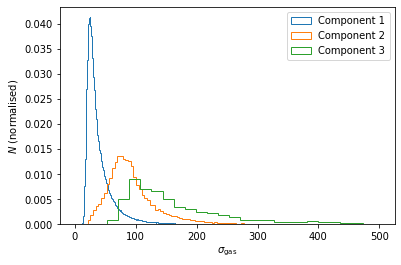

In [10]:
# Histograms showing the distribution in velocity dispersion
import matplotlib.pyplot as plt
from astropy.visualization import hist
fig, ax = plt.subplots(nrows=1, ncols=1)
for nn in range(1, 4):
    hist(df[f"sigma_gas (component {nn})"].values, bins="scott", ax=ax, range=(0, 500), normed=True, histtype="step", label=f"Component {nn}")
ax.legend()
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$ (normalised)")

You can also select a subset of the full data sample as follows:

Text(0.5, 1.0, 'Seyfert-like spaxels only')

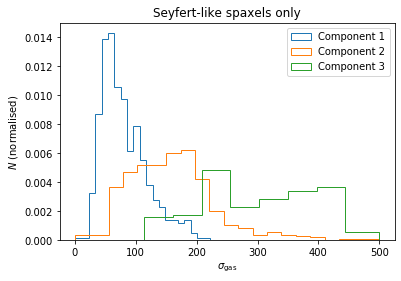

In [11]:
df_agn = df[df["BPT (total)"] == "Seyfert"]
fig, ax = plt.subplots(nrows=1, ncols=1)
for nn in range(1, 4):
    hist(df_agn[f"sigma_gas (component {nn})"].values, bins="scott", ax=ax, range=(0, 500), normed=True, histtype="step", label=f"Component {nn}")
ax.legend()
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$ (normalised)")
ax.set_title("Seyfert-like spaxels only")

## Using `spaxelsleuth.plotting` to plot the whole SAMI sample 
--- 
In the below cells, we will demonstrate how to use various functions in `spaxelsleuth.plotting` to make different kinds of plots useful for analysing the entire SAMI data set.

In [12]:
%matplotlib widget

In [13]:
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours, plot2dscatter

#### Plot the distribution of spaxels in the WHAN diagram
The WHAN diagram, developed by Cid Fernandes et al. (2010, 2011), plots the H$\alpha$ equivalent width (EW) against the [NII]6583Å/H$\alpha$ line ratio, and can be used to distinguish between emission by star formation, AGN and hot, low-mass evolved stars.

In [14]:
# Plot a 2D histogram showing the distribution of SAMI spaxels in the WHAN diagram
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="count", log_z=True,
              plot_colorbar=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
# Repeat the above, but colour by the median BPT classification
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="BPT (numeric) (total)", 
              plot_colorbar=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
# Repeat the above, but colour by the D4000Å break strength
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="D4000", 
              plot_colorbar=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [31]:
# If we like, we can use a different colourmap using the "cmap" keyword.
# The contour colours can also be changed using the "colors" keyword, and the levels can be changed using "levels".
# The axis limits can also be changed using the "xmin", "xmax", "ymin", "ymax" and "vmin", "vmax" keyword.
# We can also change the number of histogram bins using the "nbins" keyword.
import numpy as np
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)", xmin=-0.6, xmax=0.0,
              col_y=f"log HALPHA EW (total)", 
              col_z="D4000", vmin=1.1, vmax=2.0,
              nbins=50, 
              cmap="cubehelix", colors="yellow", levels=np.logspace(0, 4, 5),
              plot_colorbar=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Plot optical diagnostic ("BPT") diagrams for the full sample, showing the distribution of spaxels in all SAMI galaxies

In [32]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  ax=axs_bpt[cc],
                  cax=None,
                  plot_colorbar=True if cc==2 else False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Repeat the above, but colour the histograms by $\sigma_{\rm gas}$ for the narrowest component (component 1)

In [33]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="sigma_gas (component 1)", 
                  vmax=150,  # Tweak the z-axis scaling to bring out details 
                  ax=axs_bpt[cc],
                  cax=None,
                  plot_colorbar=True if cc==2 else False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Using `spaxelsleuth.plotting` to plot individual galaxies
--- 
In the below cells, we will demonstrate how create plots based on individual SAMI galaxies using functions in `spaxelsleuth.plotting`.


In [17]:
# Pick a galaxy, based on its GAMA ID. 
gal = 572402  # This one is my favourite.

In [18]:
# Select the rows in the DataFrame that belong to this galaxy.
df_gal = df[df["catid"] == gal]

#### Plot the SDSS image 
----
`plot_sdss_image()` retrieves an RGB SDSS image using the DR16 Image Cutout service and plots it, overlaid with the SAMI field-of-view plus a scale bar to show the physical scale at the galaxy's redshift. If the galaxy lies outside the SDSS footprint (which is the case for some cluster targets) then no image is displayed. 

In [19]:
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
ax = plot_sdss_image(df_gal)
ax.set_title(f"GAMA{gal}")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'GAMA572402')

#### Plot 2D maps showing various quantities in this galaxy
Given a DataFrame corresponding to a single galaxy, `plot2dmap()` reconstructs a 2D image of a specified column (e.g., velocity dispersion) from the rows and plots it. 

In [20]:
from spaxelsleuth.plotting.plot2dmap import plot2dmap
fig, ax = plot2dmap(df_gal=df_gal, col_z="BPT (numeric) (total)", bin_type="default", survey="sami")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
# Playing with input arguments 
# As in plot2dhistcontours, the maximum colour scaling can be set using "vmin" and "vmax" and the colourmap can be changed using "cmap". 
# The quantity that is used to plot contours can be set to any column in the DataFrame using "col_z_contours" and the colours and linewidths can be configured using "colours" and "linewidths".
_ = plot2dmap(df_gal=df_gal, col_z="v_gas (component 1)", bin_type="default", survey="sami",
              cmap="jet", vmin=-50, vmax=+50,
              col_z_contours="v_gas (component 1)", levels=[-40, -20, 0, 20, 40], colors="pink", linewidths=2.5)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/u5708159/python/Modules/spaxelsleuth/plotting/plot2dmap.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gal["x, y (pixels)"] = list(zip(df_gal["x (projected, arcsec)"] / as_per_px, df_gal["y (projected, arcsec)"] / as_per_px))


In [24]:
# Slightly more advanced example: plot the gas velocity for each individual component.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
fig.subplots_adjust(wspace=0)

for nn in range(3):
    # Pass the axis to plot_2dmap()
    fig, ax = plot2dmap(df_gal=df_gal, col_z=f"v_gas (component {nn + 1})", bin_type="default", survey="sami", 
                        vmin=-100, vmax=+100,
                        ax=axs[nn], plot_colorbar=True if nn == 2 else False, show_title=True if nn == 1 else False)

# In plot2dmap, the existing axis has to be destroyed and replaced with an identical axis with the correct WCS. Therefore, we need to update our list of axes.
axs_new = fig.get_axes()[:-1]

# Turn off the y-axis ticks on axes 2 and 3
for ax in axs_new[1:]:
    lon = ax.coords[0]
    lat = ax.coords[1]
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Scatter plots 
Create a BPT diagram with 2D histograms and contours showing the distribution in the full sample, with the data points from this galaxy overlaid on top using a scatter plot.

In [25]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  cmap="bone_r", alpha=0.4,
                  ax=axs_bpt[cc],
                  plot_colorbar=False)
    
    # Scatter plot for this galaxy
    _ = plot2dscatter(df=df_gal, 
                      col_x=f"{col_x} (total)",
                      col_y=f"log O3 (total)",
                      col_z=f"v_gas (component 2)",
                      ax=axs_bpt[cc],
                      vmin=-100, vmax=+100,
                      plot_colorbar=True if cc==2 else False)
    
# Turn of y-axis labels 
[ax.set_ylabel("") for ax in axs_bpt[1:]]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[Text(0, 0.5, ''), Text(0, 0.5, '')]